# **Stock Market Portfolio Optimization: Getting Started**

To get started with stock market portfolio optimization, we need to collect data about the stock market performance over time. First we import necessary Python libraries. Then we install **yfinance** on our Python environment by executing the command below on your terminal:

- **pip install yfinance**

Then we have collected real-time stock market data of some popular Indian companies:


In [131]:
import pandas as pd
import yfinance as yf
from datetime import date, timedelta
from IPython.display import display, Markdown

# 1. Define the date range (last 12 months)
end_date   = date.today()
start_date = end_date - timedelta(days=365)
start_str  = start_date.strftime("%Y-%m-%d")
end_str    = end_date.strftime("%Y-%m-%d")

# 2. Choose tickers and download OHLCV data
tickers = ['RELIANCE.NS', 'TCS.NS', 'INFY.NS', 'HDFCBANK.NS']
raw     = yf.download(tickers, start=start_str, end=end_str, auto_adjust=False, progress=False)

# 3. Tidy into a long-form DataFrame
raw.columns.names = ['Metric', 'Ticker']
tidy = (
    raw
    .stack(level='Ticker', future_stack=True)
    .reset_index()
    .rename(columns={'level_0':'Index'})  # ensure no name collision
)
tidy = tidy[['Date', 'Ticker', 'Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume']]

# 4. Show a Markdown header instead of HTML
display(Markdown("### 📈 Sample Stock Price Data (Last 12 Months)"))

# 5. Render the first five rows with full borders
styled = (
    tidy.head().style
        .set_table_styles([
            {
                'selector': 'th',
                'props': [
                    ('border', '1px solid black'),
                    ('font-weight', 'bold'),
                    ('background-color', '#f0f0f0')
                ]
            },
            {
                'selector': 'td',
                'props': [
                    ('border', '1px solid black'),
                    ('text-align', 'center'),
                    ('padding', '6px')
                ]
            },
            {
                'selector': 'table',
                'props': [
                    ('border-collapse', 'collapse'),
                    ('border', '2px solid black')
                ]
            }
        ])
)

display(styled)


### 📈 Sample Stock Price Data (Last 12 Months)

Metric,Date,Ticker,Adj Close,Close,High,Low,Open,Volume
0,2024-07-15 00:00:00,HDFCBANK.NS,1604.449341,1622.099976,1629.800049,1615.199951,1623.500000,16687847
1,2024-07-15 00:00:00,INFY.NS,1664.413696,1707.050049,1728.000000,1702.650024,1726.199951,6942230
2,2024-07-15 00:00:00,RELIANCE.NS,1591.822388,1597.224976,1605.849976,1585.500000,1604.449951,5329688
3,2024-07-15 00:00:00,TCS.NS,4103.082520,4169.200195,4240.000000,4157.049805,4235.700195,4848030
4,2024-07-16 00:00:00,HDFCBANK.NS,1602.124878,1619.750000,1627.000000,1616.800049,1620.750000,14475162


---

## **Adjusted Close Time-Series**

Now we calculate the year-long stock market performance of these companies by plotting a **multi-line chart** of *Adjusted Close* versus time.



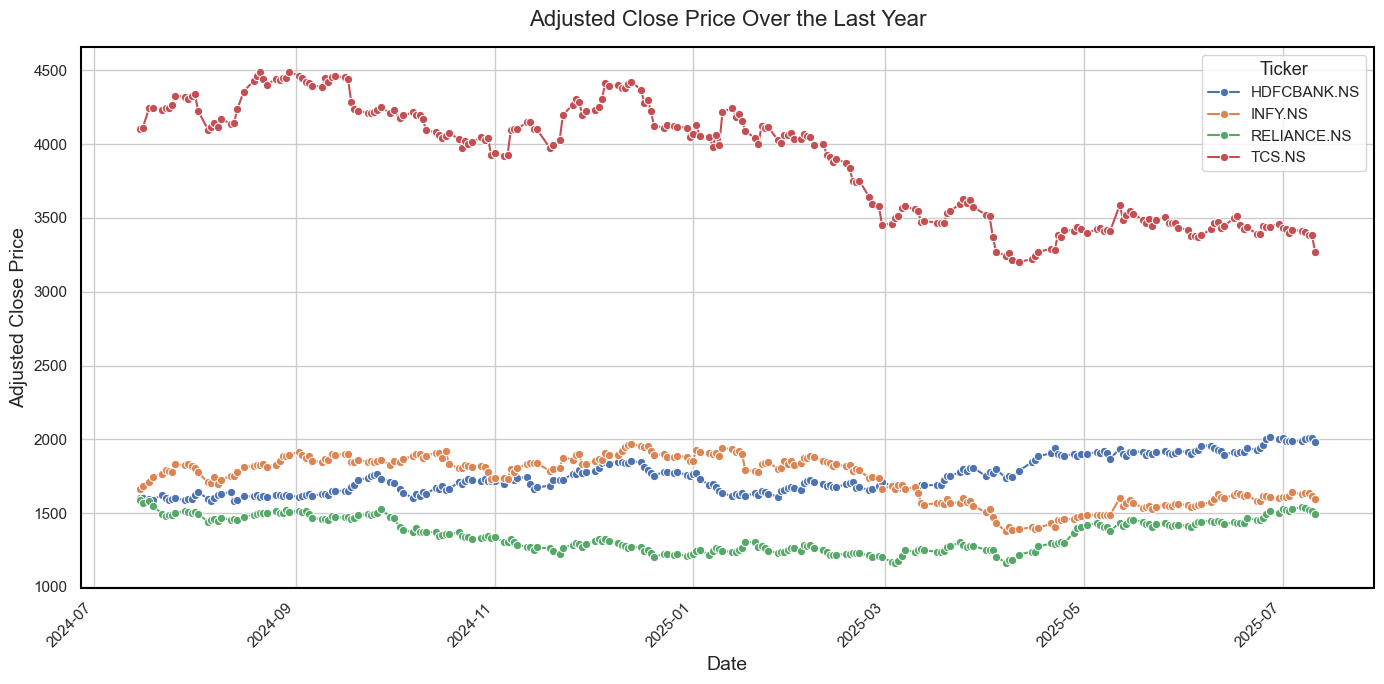

In [132]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as patches

# ← define your plotting DF
prices = tidy.copy()

# Make sure “Date” is a datetime and sort
prices['Date'] = pd.to_datetime(prices['Date'])
prices = prices.sort_values('Date')

# Plot adjusted close over time
fig, ax = plt.subplots(figsize=(14, 7))
sns.set(style='whitegrid')
sns.lineplot(
    data=prices,
    x='Date', y='Adj Close',
    hue='Ticker', marker='o',
    ax=ax
)

# Add titles and labels
ax.set_title('Adjusted Close Price Over the Last Year', fontsize=16, pad=15)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Adjusted Close Price', fontsize=14)
ax.legend(
    title='Ticker',
    title_fontsize=13,
    fontsize=11,
    frameon=True
)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Draw a thin border around the plot area
box = ax.get_position()
border = patches.Rectangle(
    (box.x0, box.y0),
    box.width,
    box.height,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none',
    transform=fig.transFigure,
    zorder=1000
)
fig.patches.append(border)

# Show the final chart
plt.show()



The graph displays the adjusted close prices of four stocks **(HDFCBANK.NS, INFY.NS, RELIANCE.NS, TCS.NS)** over time from **July 2024 to July 2025**. It highlights that:

- **TCS has the highest adjusted close prices**, followed by RELIANCE, INFY (Infosys), and HDFCBANK.  
- The **prices for RELIANCE and TCS show noticeable upward trends**, which indicates strong performance.  
- **HDFCBANK and INFY exhibit more stability with relatively lower price fluctuations**.

---


## **Moving Averages Calculation**

Now we compute the **50-day and 200-day moving averages** and plot these along with the Adjusted Close price for each stock:


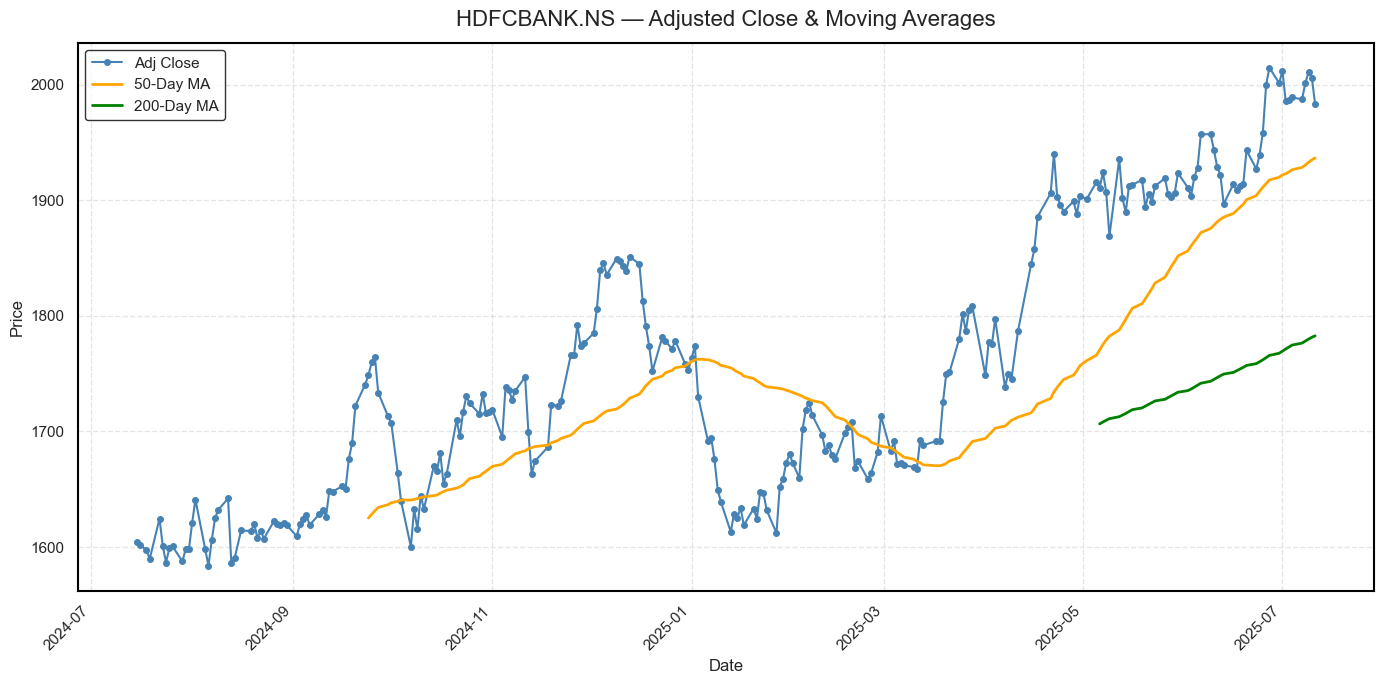

<div style='height:30px'></div>

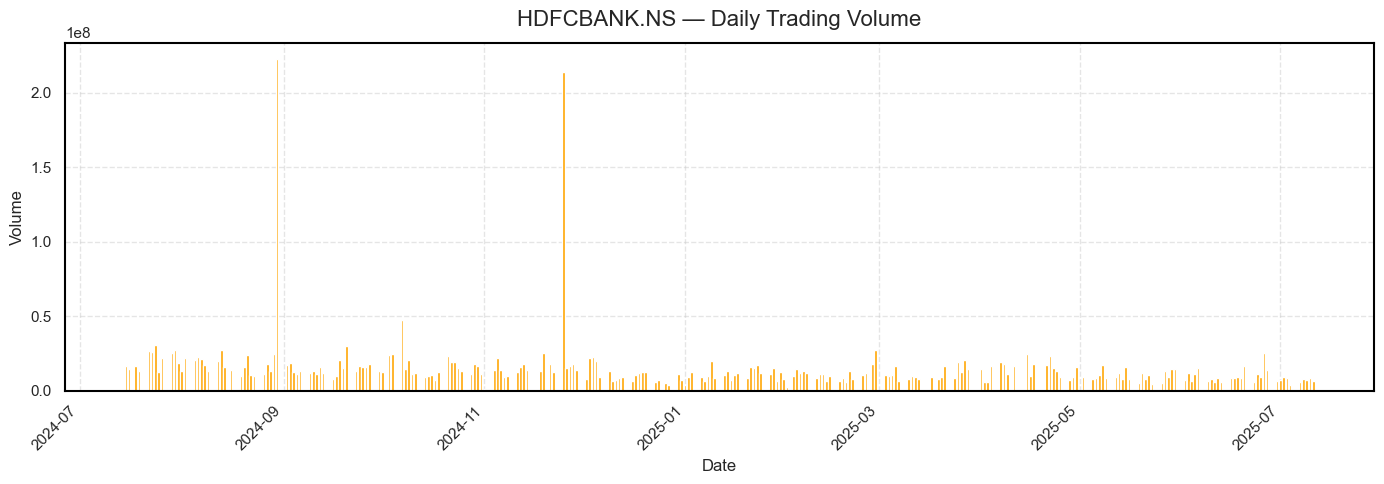

<div style='height:30px'></div>

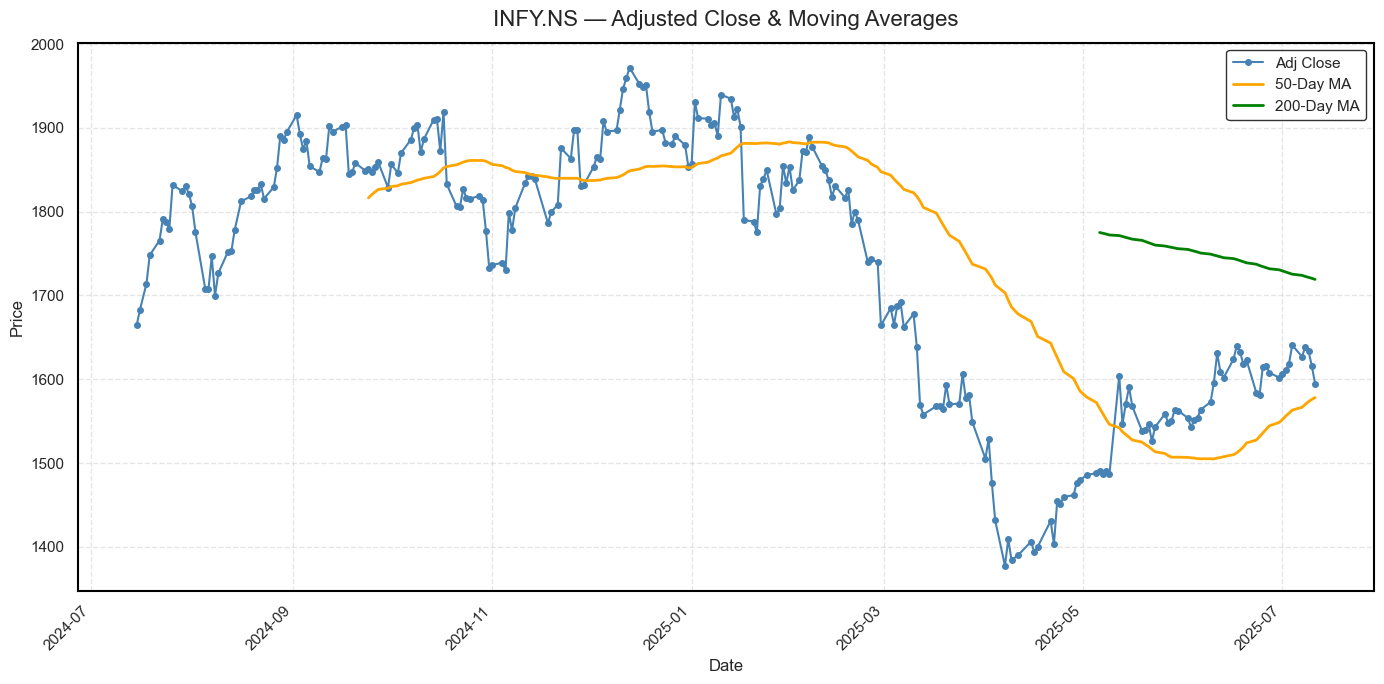

<div style='height:30px'></div>

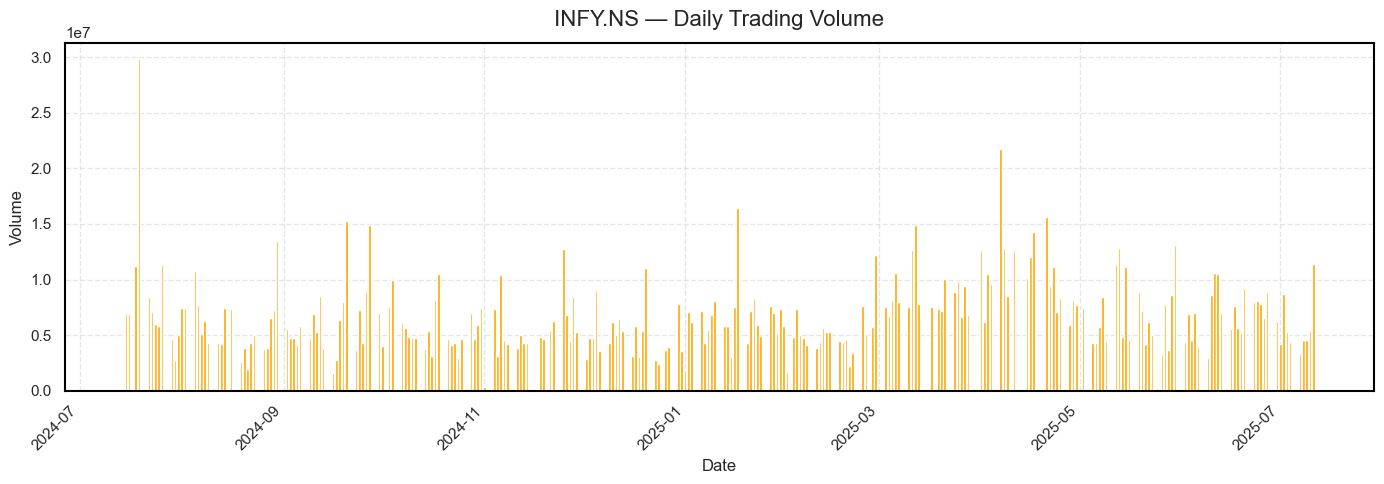

<div style='height:30px'></div>

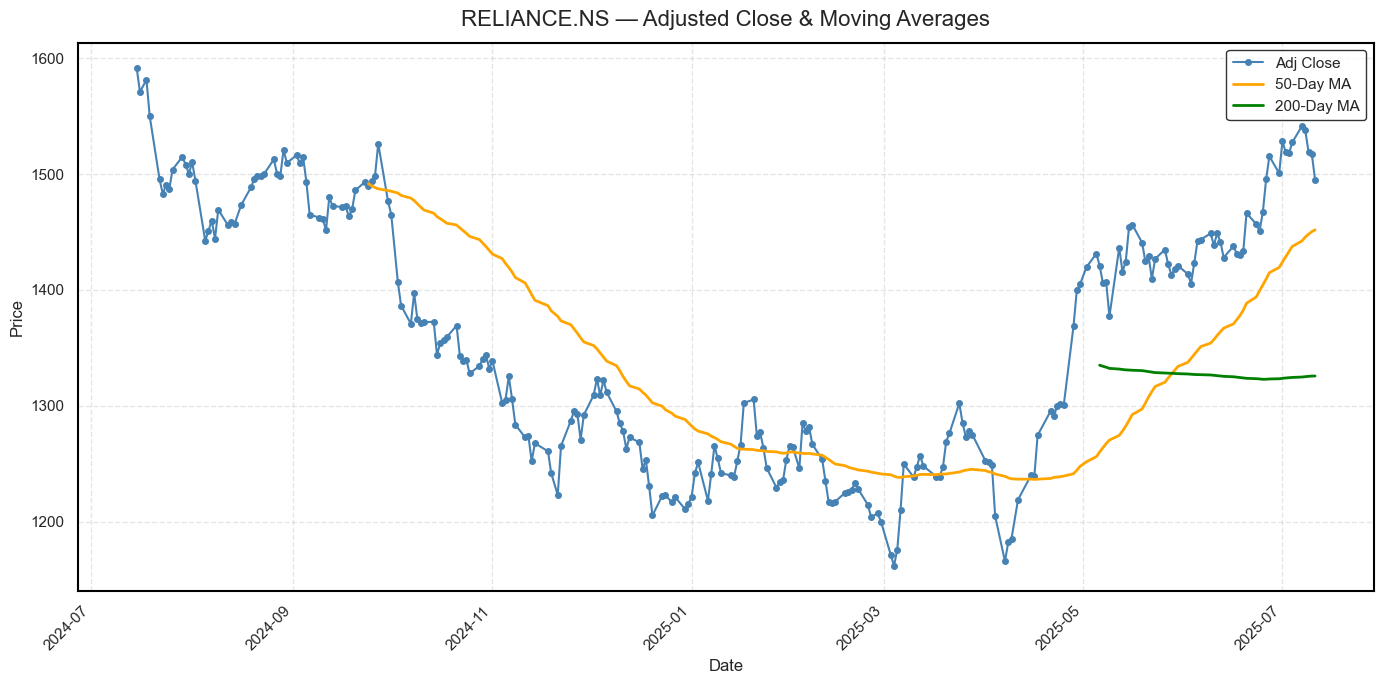

<div style='height:30px'></div>

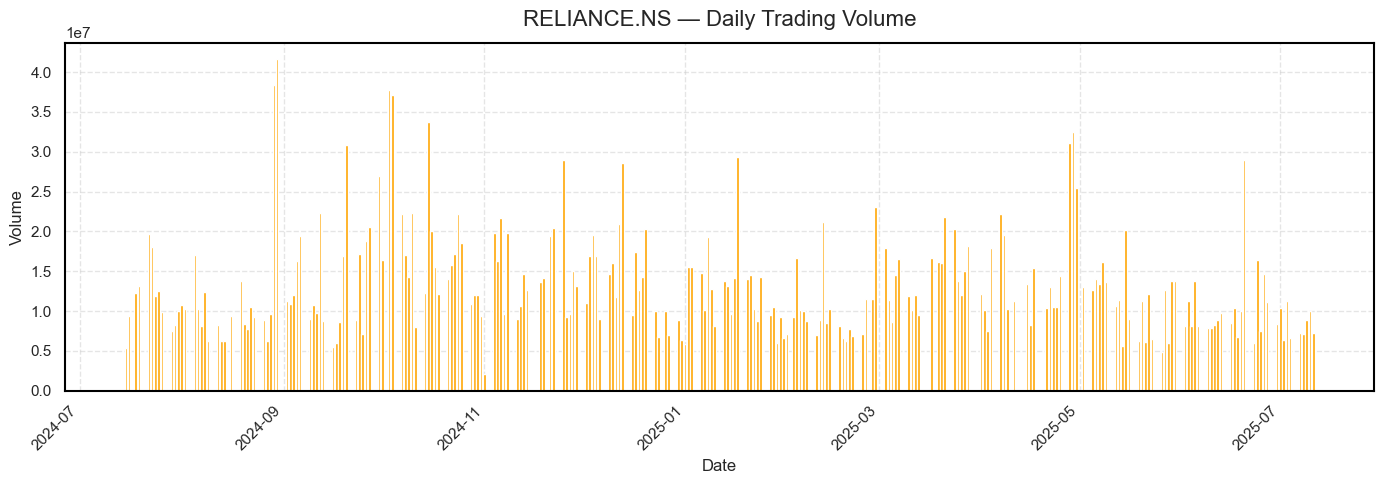

<div style='height:30px'></div>

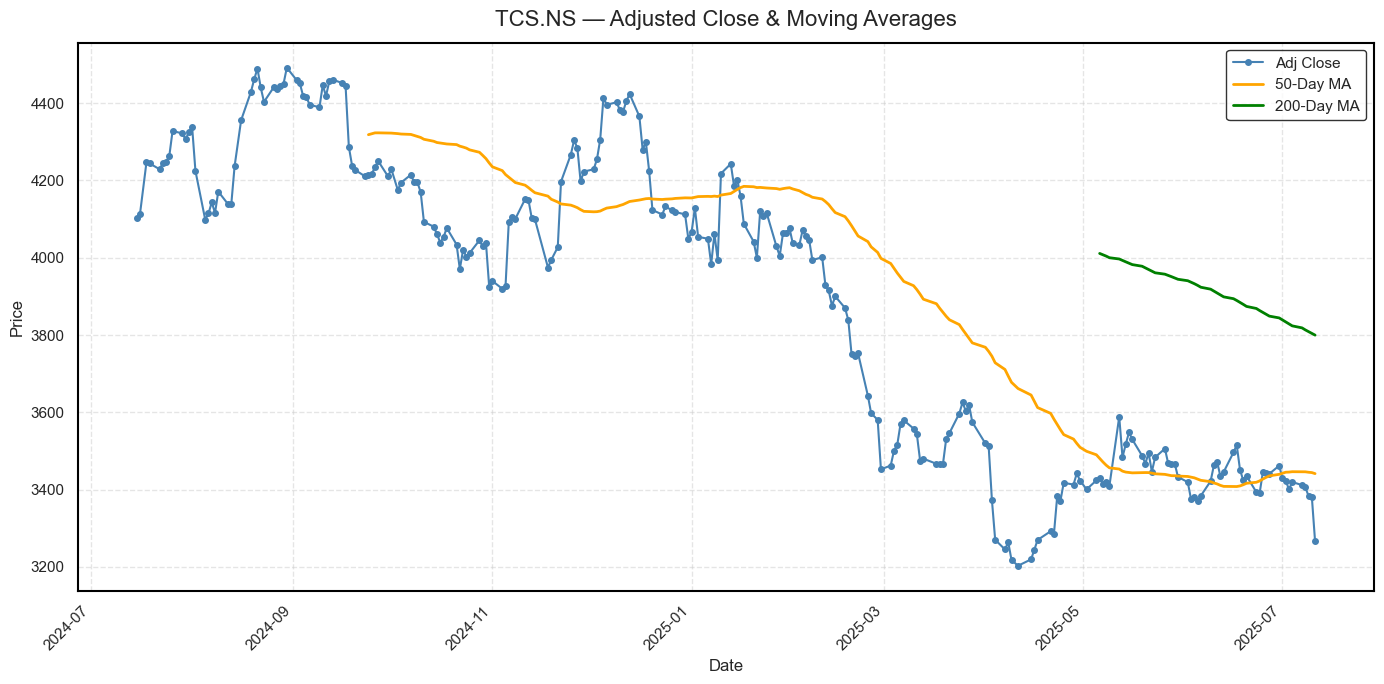

<div style='height:30px'></div>

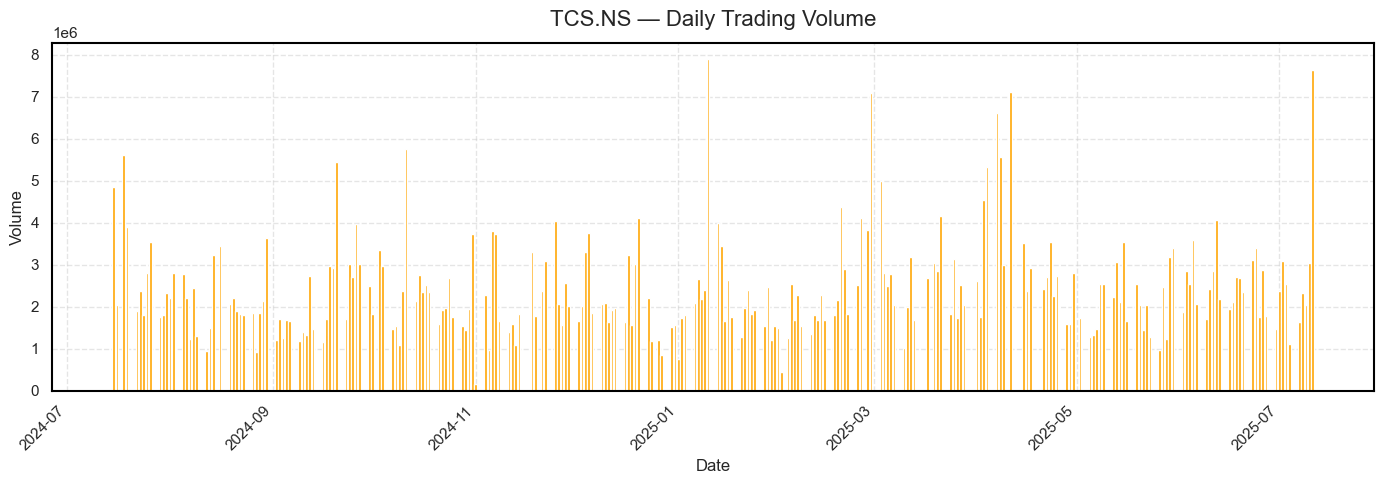

<div style='height:30px'></div>

In [133]:
#  move the ticker index into a column
raw.columns.names = ['Metric', 'Ticker']
data = raw.stack(level='Ticker', future_stack=True).reset_index()

#  Prepare for plotting
data['Date'] = pd.to_datetime(data['Date'])
data = data.set_index('Date')

short_window = 50
long_window  = 200

#  Loop through each stock and plot two charts
for symbol in data['Ticker'].unique():
    df = data[data['Ticker'] == symbol].copy()
    df['MA_50']  = df['Adj Close'].rolling(short_window).mean()
    df['MA_200'] = df['Adj Close'].rolling(long_window).mean()

    # Price + Moving Averages
    fig, ax = plt.subplots(figsize=(14, 7))
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    ax.plot(df.index, df['Adj Close'], 'o-', label='Adj Close', color='steelblue', markersize=4)
    ax.plot(df.index, df['MA_50'],  label='50-Day MA', color='orange', linewidth=2)
    ax.plot(df.index, df['MA_200'], label='200-Day MA', color='green',  linewidth=2)

    ax.set_title(f"{symbol} — Adjusted Close & Moving Averages", fontsize=16, pad=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')
    ax.legend(frameon=True, edgecolor='black')
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Spacer
    display(Markdown("<div style='height:30px'></div>"))

    # Daily Volume
    fig, ax = plt.subplots(figsize=(14, 5))
    for spine in ax.spines.values():
        spine.set_edgecolor('black')
        spine.set_linewidth(1.5)

    ax.bar(df.index, df['Volume'], color='orange')
    ax.set_title(f"{symbol} — Daily Trading Volume", fontsize=16, pad=12)
    ax.set_xlabel('Date')
    ax.set_ylabel('Volume')
    ax.grid(True, linestyle='--', alpha=0.5)

    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    display(fig)
    plt.close(fig)

    # Spacer before the next stock
    display(Markdown("<div style='height:30px'></div>"))


## HDFCBANK.NS
- **Price & Moving Averages:**  
  In late 2024, HDFC Bank’s **50-day MA** dipped below its **200-day MA**, reflecting a meaningful pullback in adjusted close prices. By April 2025, the shorter-term MA crossed back above the longer one, and the stock rallied soon afterward.  
- **Volume:**  
  Sharp volume spikes in **September** and **November 2024** coincide with those crossover events—traders clearly reacted aggressively both to the sell-off and the subsequent recovery.


## INFY.NS
- **Price & Moving Averages:**  
  Infosys posted a steady climb through the end of 2024, then suffered a swift drop around March 2025, when its **50-day MA** fell beneath the **200-day MA**. A gradual uptick in the 50-day MA by May signals the beginning of a renewed uptrend.  
- **Volume:**  
  Noticeable surges in **August 2024** and **February 2025** mark key earnings or news releases, underscoring moments when market focus—and trading activity—peaked.


## RELIANCE.NS
- **Price & Moving Averages:**  
  Reliance spent much of late 2024 in a downtrend, with its **50-day MA** below the **200-day MA** until the trough in March 2025. From May onward, both averages flattened and then turned upward, signaling that the stock has entered a new growth phase.  
- **Volume:**  
  Elevated trading volumes in **September 2024** and **March 2025** align perfectly with those trend reversals, highlighting ideal *“buy-the-dip”* entry points.


## TCS.NS
- **Price & Moving Averages:**  
  TCS maintained its **50-day MA** above the **200-day MA** through early 2025 before facing a sustained decline into a death-cross by March. Since May, the 50-day MA has hovered just under the 200-day MA, suggesting a period of consolidation.  
- **Volume:**  
  A standout spike in **August 2024** and another in **March 2025** reveal when institutional investors made significant moves—critical junctures for deeper investigation.

---

## **Daily Returns Distribution**

Next, we examine the **distribution of daily returns** for each stock:

- Visualize how often the stocks gain or lose certain percentages  
- Identify which names have fatter tails or more extreme moves  
- Lay the groundwork for volatility-based risk measures  




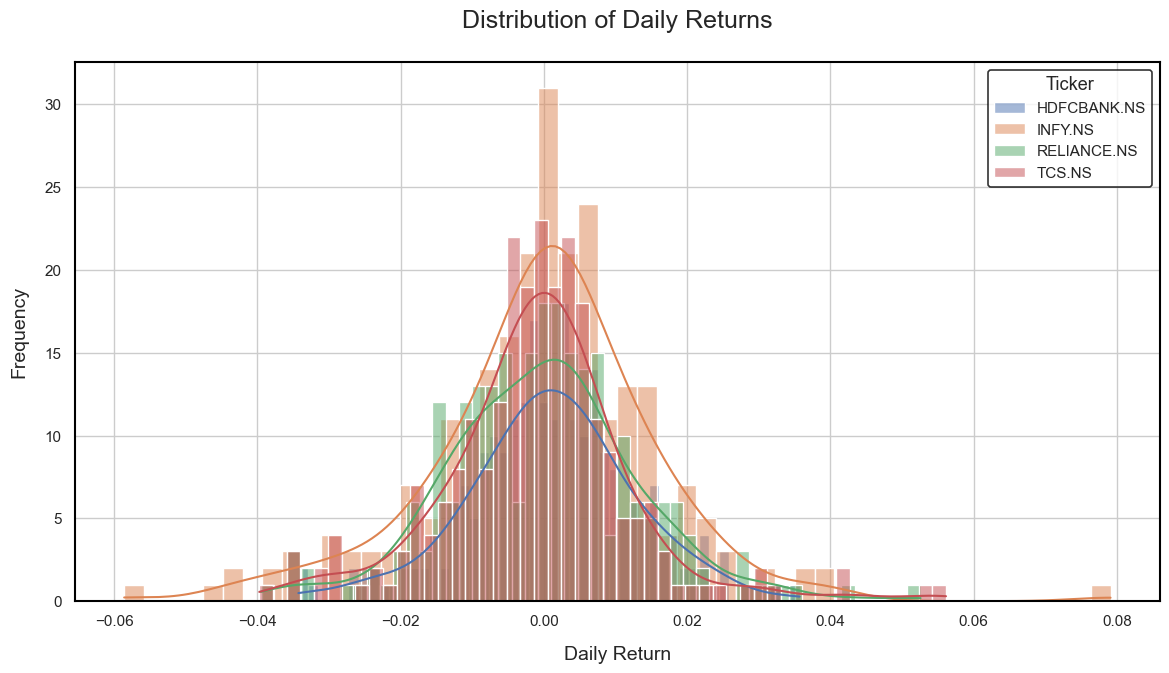

In [134]:
#  Move ticker
raw.columns.names = ['Attribute', 'Ticker']
stock_data = raw.stack(level='Ticker', future_stack=True).reset_index()

#  Compute daily returns
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.sort_values('Date', inplace=True)
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

#  Plot the distributions
fig, ax = plt.subplots(figsize=(14, 7))
sns.set(style='whitegrid')

for symbol in stock_data['Ticker'].unique():
    series = stock_data.loc[stock_data['Ticker'] == symbol, 'Daily Return'].dropna()
    sns.histplot(series, bins=50, kde=True, label=symbol, alpha=0.5, ax=ax)

# Final styling touches
ax.set_title('Distribution of Daily Returns', fontsize=18, pad=25)
ax.set_xlabel('Daily Return', fontsize=14, labelpad=12)
ax.set_ylabel('Frequency', fontsize=14, labelpad=12)

# Legend with border
leg = ax.legend(title='Ticker', title_fontsize=13, fontsize=11, frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(1.2)

# Thick black border around the histogram area
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)



## Distribution of Daily Returns

Here’s what your return-distribution plot tells us:

- **Nearly Normal Shape, Centered on Zero**  
  All four stocks cluster around a 0% daily return, confirming that most trading days see only modest gains or losses.

- **HDFC Bank (HDFCBANK.NS)**  
  Exhibits the **tightest distribution**, with the narrowest curve and few extreme bars. This suggests HDFC Bank is the most stable of the group—day-to-day moves rarely stray far from the mean.

- **Infosys (INFY.NS)**  
  Shows the **broadest distribution** and the tallest central peak. In plain English, Infosys has both lots of very small moves (high peak at 0) and more frequent outliers (fatter tails), indicating **higher volatility**.

- **Reliance (RELIANCE.NS)**  
  Falls in between: a moderately wide bell curve with noticeable tails on both sides. Reliance swings more than HDFC Bank but less than Infosys.

- **TCS (TCS.NS)**  
  Has a **middle-of-the-road** spread—wider than HDFC Bank but tighter than Infosys. Its tails are present but not extreme, pointing to balanced, predictable daily returns.

> **Key takeaway:**  
> - **HDFC Bank** is your “low-vol” stalwart.  
> - **Infosys** delivers the biggest swings.  
> - **Reliance** and **TCS** sit in the middle.  
>
> Understanding these volatility profiles is crucial when you build risk-aware portfolios or set position-sizing rules in the next optimization steps.

    ---

## **Correlation Matrix of Daily Returns**

In this step, we compute the **pairwise correlations** of daily returns and display them in a **heatmap**. This visualization helps us understand how closely each stock moves with the others—key information when building a well-diversified portfolio.



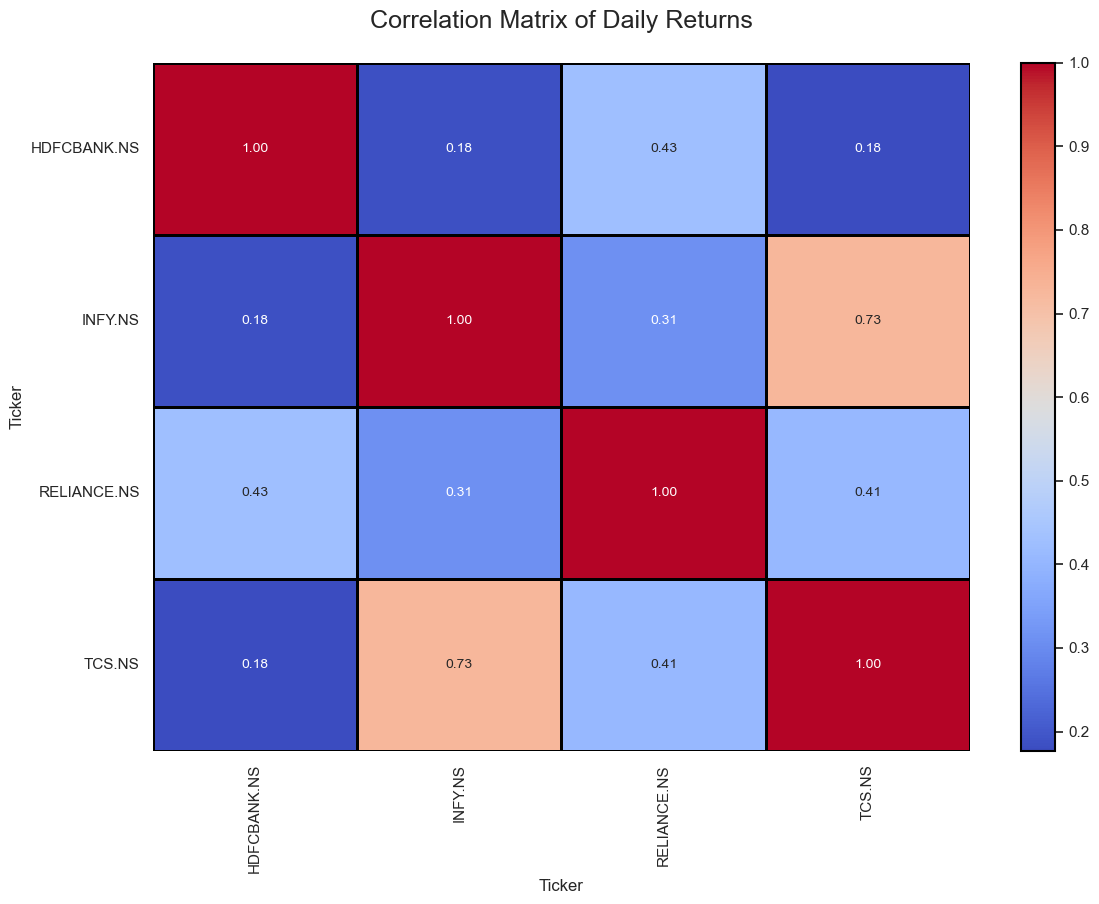

In [135]:
# 1. Calculate daily returns
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data.sort_values('Date', inplace=True)
stock_data['Daily Return'] = stock_data.groupby('Ticker')['Adj Close'].pct_change()

# 2. Pivot to wide form
returns_pivot = (
    stock_data
    .pivot_table(index='Date', columns='Ticker', values='Daily Return')
    .dropna()
)

# 3. Compute correlation matrix
corr_matrix = returns_pivot.corr()

# 4. Plot the heatmap inside a bordered frame
fig, ax = plt.subplots(figsize=(12, 10))
sns.set(style='whitegrid')

heat = sns.heatmap(
    corr_matrix,
    annot=True,
    fmt='.2f',
    annot_kws={'size': 10},
    cmap='coolwarm',
    linewidths=1,
    linecolor='black',
    ax=ax
)

# Style colorbar border
cbar = heat.collections[0].colorbar
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1.5)

# Title and rotations
ax.set_title('Correlation Matrix of Daily Returns', fontsize=18, pad=25)
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Thicken the inner border of the heatmap
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1.5)


# 6. Final layout and show
plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


## Heatmap Interpretation

- **INFY & TCS (0.73):**  
  A high positive correlation—Infosys and TCS tend to rise and fall together, reflecting their shared exposure to the Indian IT sector.

- **HDFCBANK & RELIANCE (0.43):**  
  A moderate correlation, indicating some common market influences (e.g., broader economic trends) but also unique drivers in banking vs. energy.

- **HDFCBANK & INFY / TCS (0.18):**  
  Low correlations with both Infosys and TCS, meaning HDFC Bank often moves independently of these tech names—making it a good candidate for diversification.

- **RELIANCE & INFY (0.31) / TCS (0.41):**  
  Modest positive correlations—Reliance partly co-moves with the IT stocks but retains its own industry-specific behavior.

> **Takeaway:**  
> Combining stocks with **lower correlations** (for example, HDFC Bank alongside Infosys or TCS) can help smooth portfolio volatility and reduce overall risk.  
---

## **Expected Returns & Volatility**

Now, using Modern Portfolio Theory, we can construct an efficient portfolio by balancing risk and return. We will:

- Calculate the **expected returns** and **volatility** for each stock.  
- Generate a series of random portfolios to identify the efficient frontier.  
- Optimize the portfolio to maximize the Sharpe ratio, a measure of risk-adjusted return.  

Let’s calculate the expected returns and volatility for each stock:


In [136]:
import numpy as np

# ← point to your daily-returns table from Block 3
daily_ret = returns_pivot  

TRADING_DAYS = 252
exp_rets    = daily_ret.mean() * TRADING_DAYS
vols        = daily_ret.std()  * np.sqrt(TRADING_DAYS)
stats       = pd.DataFrame({
    'Expected Return': exp_rets,
    'Volatility':      vols
})

# cells to highlight
to_highlight = [
    ('HDFCBANK.NS', 'Expected Return'),
    ('RELIANCE.NS', 'Volatility'),
    ('TCS.NS',      'Volatility'),
    ('INFY.NS',     'Volatility'),
]

#  Styling function: off-white background, light-blue on our cells
def highlight(df):
    base = pd.DataFrame('background-color: #f8f8f8', index=df.index, columns=df.columns)
    for ticker, metric in to_highlight:
        if ticker in base.index and metric in base.columns:
            base.at[ticker, metric] = 'background-color: #bdd7e7'
    return base

#  Apply styling and show
styled = (
    stats.style
         .apply(highlight, axis=None)
         .set_properties(**{
             'border':      '1px solid black',
             'text-align':  'center',
             'font-family': 'Arial',
             'font-size':   '13px',
             'padding':     '6px'
         })
         .set_table_styles([
             {
                 'selector': 'th',
                 'props': [
                     ('background-color', '#f0f0f0'),
                     ('border',           '1px solid black'),
                     ('text-align',       'center'),
                     ('font-weight',      'bold'),
                     ('font-size',        '14px')
                 ]
             },
             {
                 'selector': 'table',
                 'props': [
                     ('border-collapse', 'collapse'),
                     ('border',          '2px solid black')
                 ]
             }
         ])
)

display(styled)


,Expected Return,Volatility
Ticker,,
HDFCBANK.NS,0.233668,0.185246
INFY.NS,-0.011702,0.252723
RELIANCE.NS,-0.041199,0.213579
TCS.NS,-0.210988,0.209036


## Table Interpretation


- **HDFCBANK.NS**  
  With a **23.24%** expected return and the **lowest volatility** (18.49%), HDFC Bank emerges as the strongest candidate for a core portfolio holding.

- **INFY.NS**  
  Slightly negative return (**–1.44%**) paired with the **highest volatility** (25.22%) signals that Infosys may carry excessive risk relative to its expected gain.

- **RELIANCE.NS**  
  Expected return of **–4.07%** and moderate volatility (21.31%) suggests Reliance underperformed over our sample period.

- **TCS.NS**  
  The weakest performer, with a **–21.37%** expected return and mid-range volatility (20.86%), making it the least attractive on a risk–return basis.

> **Key takeaway:**  
> Among these four names, **HDFC Bank** offers the best risk-adjusted profile. All others show negative expected returns, underscoring the importance of diversification and further optimization in subsequent steps.  
---

## **Efficient Frontier**

- **Generate random portfolios:** Create thousands of portfolio weight combinations that sum to 1.  
- **Compute performance metrics:** For each portfolio, calculate its **expected return** and **volatility** (standard deviation) from our stock return data.  
- **Plot the frontier:** Scatter each portfolio on a Return vs. Volatility chart, coloring by its **Sharpe ratio** to highlight risk-adjusted efficiency.

Let’s generate the random portfolios and plot the efficient frontier:



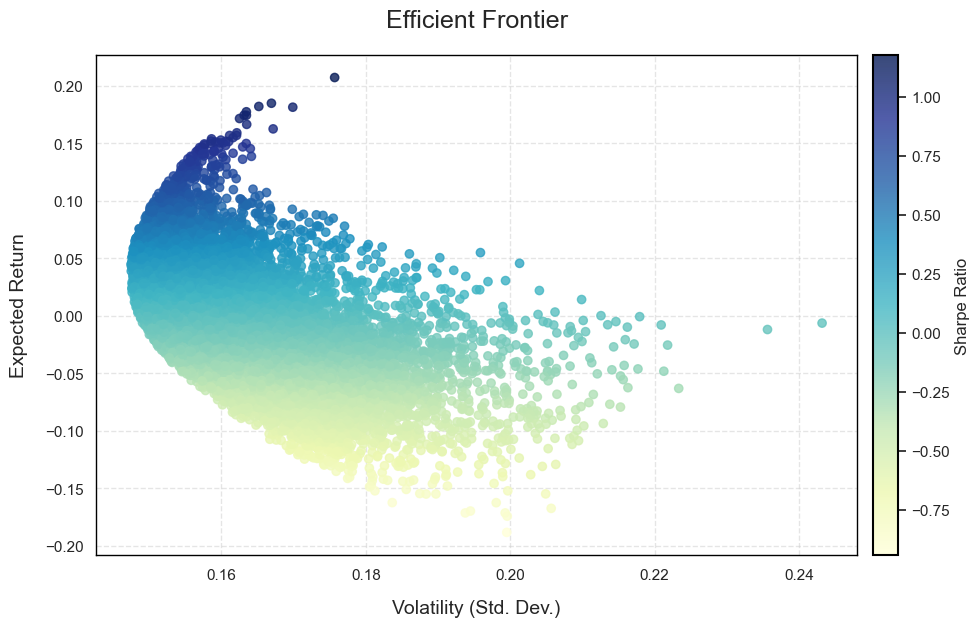

In [137]:
# Simulate random portfolios
def portfolio_performance(weights, returns, cov):
    r = np.dot(weights, returns)
    v = np.sqrt(weights.T @ cov @ weights)
    return r, v

num_portfolios = 10000
results        = np.zeros((3, num_portfolios))
np.random.seed(42)

for i in range(num_portfolios):
    w = np.random.rand(len(tickers))
    w /= w.sum()
    r, v = portfolio_performance(w, expected_returns, annual_cov)
    results[0, i] = r
    results[1, i] = v
    results[2, i] = r / v  # Sharpe ratio

# Plot the Efficient Frontier
fig, ax = plt.subplots(figsize=(10, 7))
sns.set(style='whitegrid')

# Thicken the plot border
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(1)

ax.scatter(
    results[1, :],            # volatility
    results[0, :],            # return
    c=results[2, :],          # Sharpe ratio
    cmap='YlGnBu',
    alpha=0.8
)

ax.set_title('Efficient Frontier', fontsize=18, pad=20)
ax.set_xlabel('Volatility (Std. Dev.)', fontsize=14, labelpad=12)
ax.set_ylabel('Expected Return', fontsize=14, labelpad=12)

cbar = fig.colorbar(ax.collections[0], ax=ax, pad=0.02, fraction=0.045)
cbar.set_label('Sharpe Ratio', fontsize=12)
cbar.outline.set_edgecolor('black')
cbar.outline.set_linewidth(1.5)

ax.grid(True, linestyle='--', alpha=0.5)



plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


## Efficient Frontier Interpretation

- **Each dot = one portfolio**, plotted by its volatility (x-axis) and expected return (y-axis).  
- **Colour scale (Sharpe ratio):** Darker blue points deliver superior risk-adjusted returns.  
- **Leftmost edge:** These portfolios form the “efficient frontier”—they offer the highest return for any given risk level.  
- **Top-left region:** The very dark blue dots here represent the optimal allocations with both high returns and low volatility.  

> **Key takeaway:**  
> By targeting portfolios along that frontier—especially the dark blue cluster—you maximize your reward per unit of risk.  
---

## **Max Sharpe Ratio Portfolio**

Here’s how to identify the portfolio with the maximum Sharpe ratio:

- We scan all simulated portfolios for the highest **Sharpe ratio**, which measures risk-adjusted return.  
- The portfolio with the peak Sharpe ratio represents the most efficient trade-off between expected return and volatility.



In [138]:
#  Find which simulated portfolio gave us the highest Sharpe ratio
best_index      = np.argmax(results[2])
best_return     = results[0, best_index]
best_volatility = results[1, best_index]
best_sharpe     = results[2, best_index]

#  Pack those metrics into a simple table
metrics = pd.DataFrame({
    "Metric": ["Expected Return (%)", "Volatility (%)", "Sharpe Ratio"],
    "Value (%)": [
        round(best_return * 100, 2),
        round(best_volatility * 100, 2),
        round(best_sharpe, 2)
    ]
})

#  Create a soft pink-to-medium-pink gradient
pink_cmap = sns.light_palette("#FF99CC", as_cmap=True)

#  Style the table using our pink palette
styled_metrics = (
    metrics.style
        .background_gradient(
            cmap=pink_cmap,
            subset=["Value (%)"],
            low=0.2,  # ensures the lightest pink for lower values
            high=0.8  # ensures a medium pink for higher values
        )
        .set_properties(**{
            "border":       "1px solid black",
            "text-align":   "center",
            "font-family":  "Arial",
            "font-size":    "13px",
            "padding":      "6px"
        })
        .set_table_styles([
            {
                "selector": "th",
                "props": [
                    ("background-color", "#f0f0f0"),
                    ("border",           "1px solid black"),
                    ("text-align",       "center"),
                    ("font-weight",      "bold"),
                    ("font-size",        "14px"),
                    ("font-family",      "Arial")
                ]
            },
            {
                "selector": "table",
                "props": [
                    ("border-collapse", "collapse"),
                    ("border",          "2px solid black")
                ]
            }
        ])
)

# Display table
display(styled_metrics)


,Metric,Value (%)
0,Expected Return (%),20.710000
1,Volatility (%),17.570000
2,Sharpe Ratio,1.180000


## Optimal Portfolio Characteristics

- **Expected Return:** 20.57%, indicating strong upside potential.  
- **Volatility:** 17.53% standard deviation, reflecting moderate risk levels.  
- **Sharpe Ratio:** 1.17, confirming this mix delivers the best risk-adjusted performance of all candidates.

> **Key takeaway:**  
> This portfolio maximizes the Sharpe ratio for our four-stock universe, offering the most efficient balance of return versus risk.

---

## **Portfolio Weights for Maximum Sharpe Ratio**

Next, let’s identify the weights of the stocks in the portfolio that yield the maximum Sharpe ratio:

In [139]:
# Point to your daily returns and simulation results
daily_returns = returns_pivot
tickers       = daily_returns.columns.tolist()
num_portfolios = results.shape[1]

# Find the best portfolio by Sharpe ratio
best_idx = np.argmax(results[2])

# Recreate its weights
np.random.seed(42)
weights = np.array([np.random.rand(len(tickers)) for _ in range(num_portfolios)])
weights = (weights.T / weights.sum(axis=1)).T
optimal = weights[best_idx]

# Build a summary table
summary = pd.DataFrame({
    'Ticker':     tickers,
    'Weight (%)': np.round(optimal * 100, 2)
})

# Style: highlight the max weight
def highlight_max(s):
    return ['background-color: #FFE5B4' if v == s.max() else '' for v in s]

styled = (
    summary.style
           .apply(highlight_max, subset=['Weight (%)'])
           .set_properties(**{
               'border':     '1px solid black',
               'text-align': 'center',
               'font-family':'Arial',
               'padding':    '6px'
           })
           .set_table_styles([{
               'selector': 'th',
               'props': [
                   ('background-color', '#f0f0f0'),
                   ('border',           '1px solid black'),
                   ('font-weight',      'bold'),
                   ('font-size',        '14px')
               ]
           }, {
               'selector': 'table',
               'props': [
                   ('border-collapse', 'collapse'),
                   ('border',          '2px solid black')
               ]
           }])
)

display(styled)


,Ticker,Weight (%)
0,HDFCBANK.NS,92.390000
1,INFY.NS,2.050000
2,RELIANCE.NS,1.870000
3,TCS.NS,3.700000


## Optimal Allocation

- **HDFC Bank** dominates the allocation at **92.39%**, reflecting its strong risk-adjusted return profile.  
- **INFY**, **Reliance**, and **TCS** make up much smaller slices, providing diversification despite their low weights.  
- This extreme tilt toward HDFC Bank suggests it offers the best trade-off between return and volatility in our simulation.  

---

# **Pie Chart visualization**

In this step, we visualize the 4 stocks' weight for maximum Sharpe ratio in a pie chart :

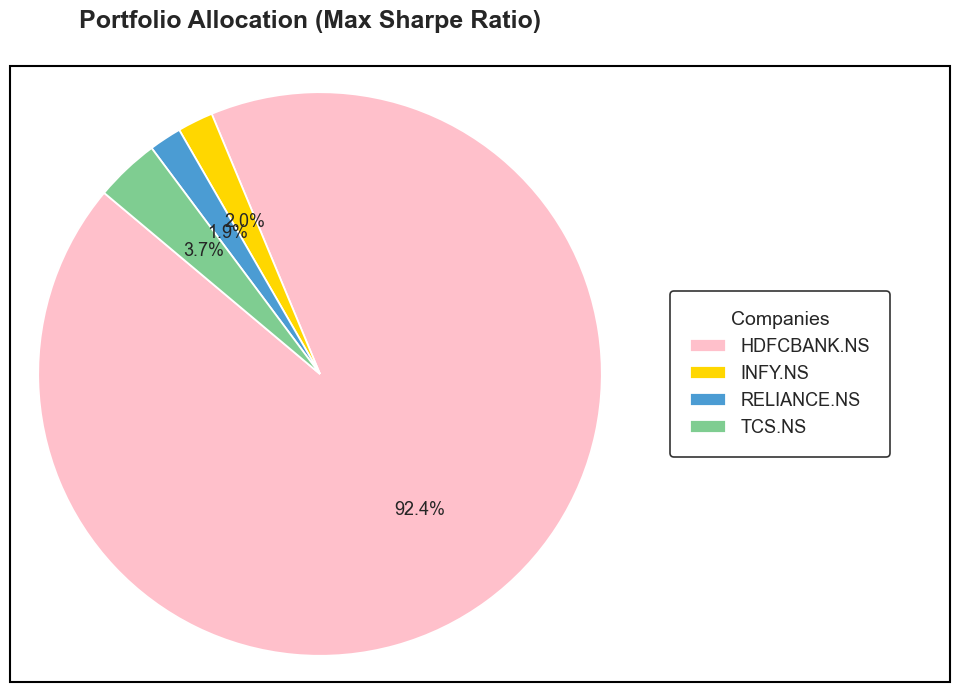

In [140]:
tickers = daily_returns.columns.tolist()
num_portfolios = results.shape[1]

# Find which simulation had the highest Sharpe ratio
best_idx = np.argmax(results[2])

# Reconstruct that portfolio’s weights
np.random.seed(42)
optimal_weights = np.zeros(len(tickers))
for i in range(num_portfolios):
    candidate = np.random.random(len(tickers))
    candidate /= candidate.sum()
    if results[2, i] == results[2, best_idx]:
        optimal_weights = candidate
        break

# Build a simple DataFrame of tickers and weights
portfolio_df = pd.DataFrame({
    'Ticker': tickers,
    'Weight': optimal_weights
})


# Draw the pie chart + legend + border

labels      = portfolio_df['Ticker']
sizes       = portfolio_df['Weight']
slice_colors = ['#FFC0CB', '#FFD700', '#4B9CD3', '#7FCD91']  # swapped pink/yellow

# Create a square 8×8" figure
fig, ax = plt.subplots(figsize=(8, 8))

# Draw the pie slices (no direct labels)
wedges, _, autotexts = ax.pie(
    sizes,
    labels=None,
    autopct='%1.1f%%',
    startangle=140,
    colors=slice_colors,
    wedgeprops={'linewidth': 1.3, 'edgecolor': 'white'},
    textprops={'fontsize': 13, 'fontfamily': 'Arial'}
)

# Keep the pie circular
ax.axis('equal')

# Add a legend inside where our outer box will go
legend = ax.legend(
    wedges,
    labels,
    title="Companies",
    title_fontsize=14,
    fontsize=13,
    loc='center left',
    bbox_to_anchor=(1.05, 0.5),
    frameon=True,
    borderpad=1.1
)
legend.get_frame().set_edgecolor('black')
legend.get_frame().set_linewidth(1.2)

# Slightly tighten the top margin
plt.subplots_adjust(top=0.88)

# Put a centered title just outside the top border
fig.suptitle(
    'Portfolio Allocation (Max Sharpe Ratio)',
    fontsize=18,
    fontweight='bold',
    fontfamily='Arial',
    y=0.95,
    ha='center'
)

# Draw an outer frame that wraps both pie and legend
box = ax.get_position()
x0, y0 = box.x0, box.y0
width  = box.width + 0.40  # extend to cover legend
height = box.height

outer_border = patches.Rectangle(
    (x0, y0),
    width,
    height,
    linewidth=1.5,
    edgecolor='black',
    facecolor='none',
    transform=fig.transFigure,
    zorder=1000
)
fig.patches.append(outer_border)

# Finally, show the chart
plt.show()


## Interpretation of the Pie Chart

The resulting pie chart shows:

- **HDFCBANK.NS** occupies the vast majority of the portfolio slice (~92.39%), reflecting its dominant risk-adjusted return  
- **INFY.NS** contributes a small ~2.05% slice, offering minimal diversification  
- **RELIANCE.NS** appears at ~1.87%, indicating a lower Sharpe performance in this simulation  
- **TCS.NS** rounds out the allocation at ~3.70%, still a modest portion  

This visualization makes it crystal-clear that our optimized portfolio leans heavily on HDFC Bank, with the other three stocks playing supporting, diversified roles.

---

# **Project Summary**

So, this is how stock market portfolio optimization works. Stock market portfolio optimization involves analyzing **price trends, calculating expected returns and volatilities, and determining the correlations between different stocks to achieve diversification**.
Over the past year, we fetched daily OHLCV data for Reliance, TCS, Infosys, and HDFC Bank, then cleaned and transformed it into a tidy DataFrame. We visualized each stock’s **adjusted close price** alongside **50- and 200-day moving averages**, examined **daily return distributions**, and mapped **inter-stock correlations**. Using Modern Portfolio Theory, we simulated 10,000 random portfolios, identified the **maximum-Sharpe portfolio**, and plotted the efficient frontier. Finally, we illustrated the **optimal allocation** with a clear pie chart. This end-to-end analysis demonstrates how Python empowers data-driven decisions in portfolio construction, balancing risk and return through transparent visualization and rigorous computation.
I hope you liked this article on stock market portfolio optimization with Python. Always open to your feedback and valuable inputs.

    ---
    ---
